Optimal Tour:
Start from B
Go to H
Go to G
Go to F
Go to C
Go to A
Go to J
Go to I
Go to D
Go to E
Return to B
Total Distance Traveled: 319.0827463085265


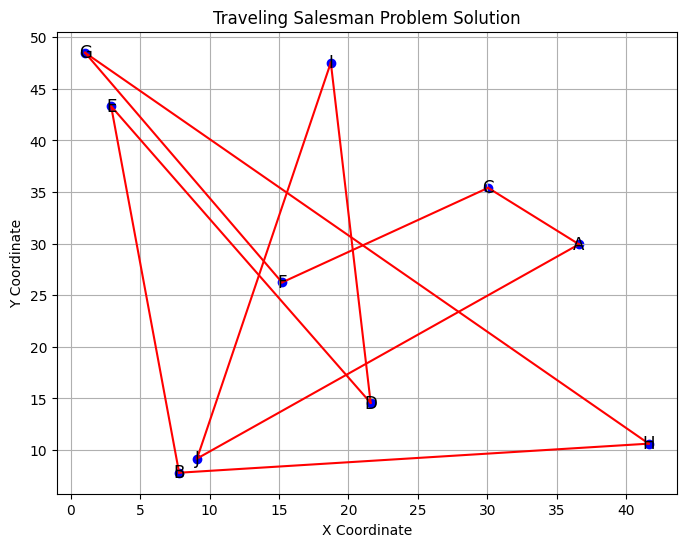

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cities with random coordinates
cities = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

# Generate random coordinates for each city
np.random.seed(42)  # for reproducibility
city_coordinates = {city: np.random.rand(2) * 50 for city in cities}

# Calculate distances between cities based on coordinates
def calculate_distances(cities):
    num_cities = len(cities)
    distances = np.zeros((num_cities, num_cities))
    for i, city_i in enumerate(cities):
        for j, city_j in enumerate(cities):
            if i != j:
                distances[i][j] = np.sqrt(np.sum((city_coordinates[city_i] - city_coordinates[city_j]) ** 2))
    return distances

# Define the Hopfield network
class HopfieldTSP:
    def __init__(self, cities, distances):
        self.cities = cities
        self.num_cities = len(cities)
        self.distances = distances
        self.weights = np.zeros((self.num_cities, self.num_cities))
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                if i != j:
                    self.weights[i][j] = -self.distances[i][j]

    def energy(self, tour):
        total_distance = 0
        for i in range(self.num_cities - 1):
            total_distance += self.distances[tour[i]][tour[i+1]]
        total_distance += self.distances[tour[-1]][tour[0]]  # Return to the starting city
        return total_distance

    def solve(self, iterations=100):
        tour = np.random.permutation(self.num_cities)
        for _ in range(iterations):
            i, j = np.random.choice(self.num_cities, 2, replace=False)
            delta_energy = 2 * (
                self.weights[i].dot(tour) * tour[i] +
                self.weights[j].dot(tour) * tour[j]
            )
            if delta_energy < 0:
                tour[i], tour[j] = tour[j], tour[i]
        return tour

# Calculate distances
distances = calculate_distances(cities)

# Create HopfieldTSP instance
hopfield_tsp = HopfieldTSP(list(cities), distances)

# Solve TSP
solution_tour = hopfield_tsp.solve()

# Print the solution and path
print("Optimal Tour:")
for i, city_index in enumerate(solution_tour):
    if i == 0:
        print(f"Start from {list(cities)[city_index]}")
    else:
        print(f"Go to {list(cities)[city_index]}")
print(f"Return to {list(cities)[solution_tour[0]]}")

# Calculate total distance traveled
total_distance = hopfield_tsp.energy(solution_tour)

# Print the total distance
print("Total Distance Traveled:", total_distance)

# Plot the cities and the tour
plt.figure(figsize=(8, 6))
for city in cities:
    plt.scatter(city_coordinates[city][0], city_coordinates[city][1], color='blue')
    plt.text(city_coordinates[city][0], city_coordinates[city][1], city, ha='center', va='center', fontsize=12)
for i in range(len(solution_tour) - 1):
    plt.plot([city_coordinates[list(cities)[solution_tour[i]]][0], city_coordinates[list(cities)[solution_tour[i+1]]][0]],
             [city_coordinates[list(cities)[solution_tour[i]]][1], city_coordinates[list(cities)[solution_tour[i+1]]][1]],
             color='red')
plt.plot([city_coordinates[list(cities)[solution_tour[-1]]][0], city_coordinates[list(cities)[solution_tour[0]]][0]],
         [city_coordinates[list(cities)[solution_tour[-1]]][1], city_coordinates[list(cities)[solution_tour[0]]][1]],
         color='red')
plt.title("Traveling Salesman Problem Solution")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()


Optimal Tour:
Start from J
Go to B
Go to F
Go to E
Go to G
Go to I
Go to C
Go to A
Go to H
Go to D
Return to J
Total Distance Traveled: 145.15338688889378


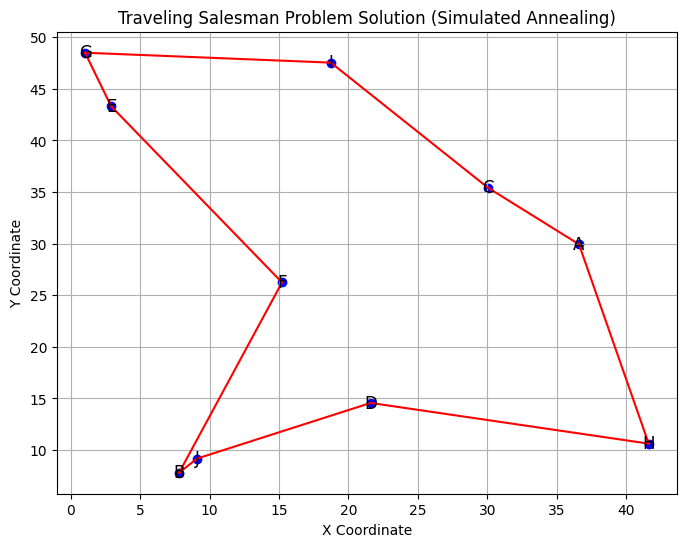

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cities with random coordinates
cities = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

# Generate random coordinates for each city
np.random.seed(42)  # for reproducibility
city_coordinates = {city: np.random.rand(2) * 50 for city in cities}

# Calculate distances between cities based on coordinates
def calculate_distances(cities):
    num_cities = len(cities)
    distances = np.zeros((num_cities, num_cities))
    for i, city_i in enumerate(cities):
        for j, city_j in enumerate(cities):
            if i != j:
                distances[i][j] = np.sqrt(np.sum((city_coordinates[city_i] - city_coordinates[city_j]) ** 2))
    return distances

# Define the Hopfield network
class HopfieldTSP:
    def __init__(self, cities, distances):
        self.cities = cities
        self.num_cities = len(cities)
        self.distances = distances
        self.weights = np.zeros((self.num_cities, self.num_cities))
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                if i != j:
                    self.weights[i][j] = -self.distances[i][j]

    def energy(self, tour):
        total_distance = 0
        for i in range(self.num_cities - 1):
            total_distance += self.distances[tour[i]][tour[i+1]]
        total_distance += self.distances[tour[-1]][tour[0]]  # Return to the starting city
        return total_distance

    def solve(self, iterations=100, initial_temperature=100, cooling_rate=0.01):
        current_tour = np.random.permutation(self.num_cities)
        current_energy = self.energy(current_tour)
        best_tour = current_tour.copy()
        best_energy = current_energy

        for iteration in range(iterations):
            # Randomly select two cities to swap
            i, j = np.random.choice(self.num_cities, 2, replace=False)

            # Swap the cities to get a new candidate tour
            new_tour = current_tour.copy()
            new_tour[i], new_tour[j] = new_tour[j], new_tour[i]

            # Calculate the energy difference
            delta_energy = self.energy(new_tour) - current_energy

            # If the new tour is better, accept it
            if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / initial_temperature):
                current_tour = new_tour
                current_energy += delta_energy

                # Update the best tour if necessary
                if current_energy < best_energy:
                    best_tour = current_tour
                    best_energy = current_energy

            # Cool down the temperature
            initial_temperature *= 1 - cooling_rate

        return best_tour

# Calculate distances
distances = calculate_distances(cities)

# Create HopfieldTSP instance
hopfield_tsp = HopfieldTSP(list(cities), distances)

# Solve TSP using simulated annealing
solution_tour = hopfield_tsp.solve(iterations=10000, initial_temperature=100, cooling_rate=0.001)

# Print the solution and path
print("Optimal Tour:")
for i, city_index in enumerate(solution_tour):
    if i == 0:
        print(f"Start from {list(cities)[city_index]}")
    else:
        print(f"Go to {list(cities)[city_index]}")
print(f"Return to {list(cities)[solution_tour[0]]}")

# Calculate total distance traveled
total_distance = hopfield_tsp.energy(solution_tour)

# Print the total distance
print("Total Distance Traveled:", total_distance)

# Plot the cities and the tour
plt.figure(figsize=(8, 6))
for city in cities:
    plt.scatter(city_coordinates[city][0], city_coordinates[city][1], color='blue')
    plt.text(city_coordinates[city][0], city_coordinates[city][1], city, ha='center', va='center', fontsize=12)
for i in range(len(solution_tour) - 1):
    plt.plot([city_coordinates[list(cities)[solution_tour[i]]][0], city_coordinates[list(cities)[solution_tour[i+1]]][0]],
             [city_coordinates[list(cities)[solution_tour[i]]][1], city_coordinates[list(cities)[solution_tour[i+1]]][1]],
             color='red')
plt.plot([city_coordinates[list(cities)[solution_tour[-1]]][0], city_coordinates[list(cities)[solution_tour[0]]][0]],
         [city_coordinates[list(cities)[solution_tour[-1]]][1], city_coordinates[list(cities)[solution_tour[0]]][1]],
         color='red')
plt.title("Traveling Salesman Problem Solution (Simulated Annealing)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()


Optimal Tour:
Start from C
Go to A
Go to H
Go to D
Go to B
Go to J
Go to F
Go to E
Go to G
Go to I
Return to C
Minimum Path Cost: 145.15918352212566


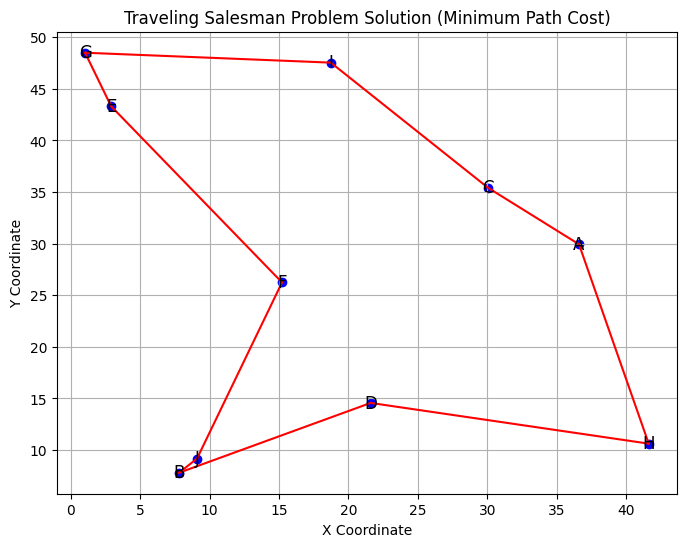

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cities with random coordinates
cities = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

# Generate random coordinates for each city
np.random.seed(42)  # for reproducibility
city_coordinates = {city: np.random.rand(2) * 50 for city in cities}

# Calculate distances between cities based on coordinates
def calculate_distances(cities):
    num_cities = len(cities)
    distances = np.zeros((num_cities, num_cities))
    for i, city_i in enumerate(cities):
        for j, city_j in enumerate(cities):
            if i != j:
                distances[i][j] = np.sqrt(np.sum((city_coordinates[city_i] - city_coordinates[city_j]) ** 2))
    return distances

# Define the Hopfield network
class HopfieldTSP:
    def __init__(self, cities, distances):
        self.cities = cities
        self.num_cities = len(cities)
        self.distances = distances
        self.weights = np.zeros((self.num_cities, self.num_cities))
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                if i != j:
                    self.weights[i][j] = -self.distances[i][j]

    def energy(self, tour):
        total_distance = 0
        for i in range(self.num_cities - 1):
            total_distance += self.distances[tour[i]][tour[i+1]]
        total_distance += self.distances[tour[-1]][tour[0]]  # Return to the starting city
        return total_distance

    def solve(self, iterations=100000):
        min_path_cost = float('inf')
        min_path_tour = None
        tour = np.random.permutation(self.num_cities)
        for iteration in range(iterations):
            i, j = np.random.choice(self.num_cities, 2, replace=False)
            delta_energy = 2 * (
                self.weights[i].dot(tour) * tour[i] +
                self.weights[j].dot(tour) * tour[j]
            )
            if delta_energy < 0:
                tour[i], tour[j] = tour[j], tour[i]
            path_cost = self.energy(tour)
            if path_cost < min_path_cost:
                min_path_cost = path_cost
                min_path_tour = tour.copy()
            # print(f"Iteration {iteration + 1}: Path Cost = {path_cost}")
        return min_path_tour, min_path_cost

# Calculate distances
distances = calculate_distances(cities)

# Create HopfieldTSP instance
hopfield_tsp = HopfieldTSP(list(cities), distances)

# Solve TSP
solution_tour, min_path_cost = hopfield_tsp.solve()

# Print the solution and path
print("Optimal Tour:")
for i, city_index in enumerate(solution_tour):
    if i == 0:
        print(f"Start from {list(cities)[city_index]}")
    else:
        print(f"Go to {list(cities)[city_index]}")
print(f"Return to {list(cities)[solution_tour[0]]}")

# Print the minimum path cost
print("Minimum Path Cost:", min_path_cost)

# Plot the cities and the tour corresponding to the minimum path cost
plt.figure(figsize=(8, 6))
for city in cities:
    plt.scatter(city_coordinates[city][0], city_coordinates[city][1], color='blue')
    plt.text(city_coordinates[city][0], city_coordinates[city][1], city, ha='center', va='center', fontsize=12)
for i in range(len(solution_tour) - 1):
    plt.plot([city_coordinates[list(cities)[solution_tour[i]]][0], city_coordinates[list(cities)[solution_tour[i+1]]][0]],
             [city_coordinates[list(cities)[solution_tour[i]]][1], city_coordinates[list(cities)[solution_tour[i+1]]][1]],
             color='red')
plt.plot([city_coordinates[list(cities)[solution_tour[-1]]][0], city_coordinates[list(cities)[solution_tour[0]]][0]],
         [city_coordinates[list(cities)[solution_tour[-1]]][1], city_coordinates[list(cities)[solution_tour[0]]][1]],
         color='red')
plt.title("Traveling Salesman Problem Solution (Minimum Path Cost)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()
